### **시계열** **예측**

#### Time Series 
시간 순서대로 발생한 데이터의 수열 

- 미래 예측의 두가지 전제 
  1. 과거의 데이터에 일정한 패턴이 발견된다
  2. 과거의 패턴은 미래에도 동일하게 반복 될 것 이다<br>

  = `안정적(Stationary)` 데이터에 대해서만 미래 예측이 가능하다 <br>
>안정적 : 시계열 데이터의 통계적 특성이 변하지 않는다

- 예측하지 못한 `외부적 변수` 에 의해 시계열 데이터의 분석의 전제인 `안정성` 이 훼손 될 수 있음 

#### Stationary Time Series 

Basic criterion for stationary time series
1. The mean of the series should not be  a function of time rather be a constant 
2. The variance of the series should not be a function of time.
3. The covariance of the i th term and the i+m th term (which is auto-covariance actually) should not be a function of time 

> Covriance (공분산) : 확률변수가 2개 이상 일 때, 각 확률변수의 분산 사이의 상관관계 를 나타냄 <br>

>Correlation (상관계수) : 공분산이 X,Y 의 크기에 영향을 받기 때문에 확률 변수의 절대적 크기에 영향을 받지 않도록 단위화(normalization) 시킨 값

즉 두 확률변수 X,Y 가 서로 독립이면 Covariance 와 Correlation 은 모두 0 이 된다

> Auto-Covariance (자기 공분산) : 확률변수 X 와 X 의 상관관계 이지만, X(t) 와 X(t+h) 사이의 공분산 을 뜻한다

X 가 Stationary 하다는 전제조건 하에 시차 h 가 같다면 AutoCovariance 는 항상 일정하다


In [ ]:
pip install --upgrade statsmodels

#### STEP 1 : Load Time Series Data

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

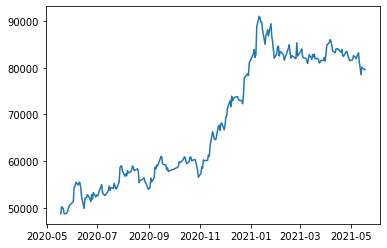

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

dataset_filepath = '/content/drive/MyDrive/data/stock_prediction/005930.KS.csv'
df = pd.read_csv(dataset_filepath,index_col='Date',parse_dates=True)
ts = df['Close']


plt.plot(ts)
ts.head()

#### STEP 2 : Preprocessing Data

In [ ]:
# delete missing value
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [ ]:
# transfer to log
ts_log= np.log(ts)

#### STEP 3 : Analysis Stationary of Time Series 

Rolling Statistics(구간 통계치)<br>
from current time step to before the time step that window is given
1. `rolling mean` 이동 평균 
2. `rolling std` 이동표준편차  

visualize rolling mean and rolling std with original time series data makes to see more of statistical characteristics 

In [ ]:
def plot_rolling_statistics(timeseries,window=12):
  
  rolmean = timeseries.rolling(window=window).mean()
  rolstd = timeseries.rolling(window=window).std()

  orig = plt.plot(timeseries,color='blue',label='Original')
  mean = plt.plot(rolmean,color='red',label='Rolling Mean')
  std = plt.plot(rolstd,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

print('🌸')

🌸


#### Augmented Dickey-Fuller Test
1. `주어진 시계열 데이터가 안정적이지 않다` 라는 귀무가설(Null Hypothesis) 를 세운 후
2. 통계적 가설 검정 과정을 통해 귀무가설이 기각 될 경우
3. `시계열 데이터가 안정적 이다` 라는 대립가설(Alternative Hypothesis) 를 채택한다

검정통계량이 Critical Value 보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열로 볼 수 있다.
> p-value(유의확률) : 현재의 관측보다 더 극단적인 관측이 나올 확률, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률. 보통 이 값이 0.05 미만일 경우 귀무가설을 기각 할 수 있다고 본다.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
  dftest = adfuller(timeseries,autolag="AIC")

  print('Resuls of Dickey-Fuller Test:')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

print('🌸')

🌸


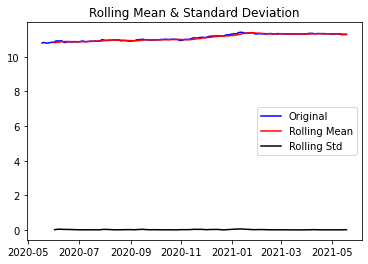

Resuls of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


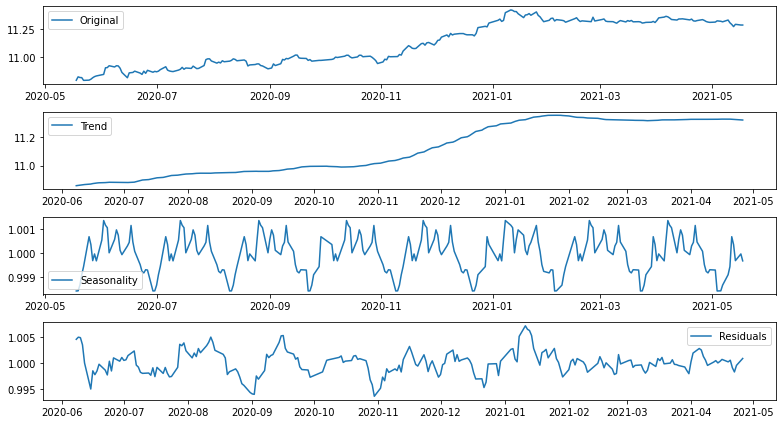

In [ ]:
plot_rolling_statistics(ts_log,window=12)

augmented_dickey_fuller_test(ts_log)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model='multiplicative',period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams['figure.figsize'] = (11,6)
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Resuls of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


#### STEP 4 : Create Train,Test Data 

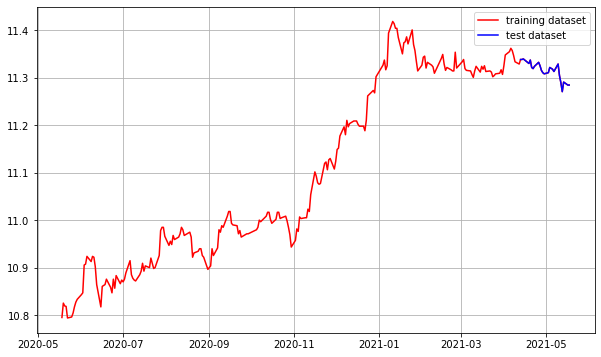

In [ ]:
train_data,test_data = ts_log[:int(len(ts_log)*0.9)],ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log,c='r',label='training dataset')
plt.plot(test_data,c='b',label='test dataset')
plt.legend()

#### STEP 5 : Find Parameters of ARIMA Model

ARIMA(Autoregressive Intergrated Moving Average) = AR(Autoregressive) + I(Integrated) + MA(Moving Average)

- AR(Autoregressive, 자기회귀) : <br>
  -  과거 값들에대한 회귀로 미래 값을 예측하는 방법
  - y_t 가 이전 p 개의 데이터의 가중합으로 수렴한다고 보는 모델
  - 시계열의 residual 에 해당하는 부분을 모델링 
  - 주식 값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점
- I(Intergrated, 차분 누적) :     
  - y_t 이 이전 데이터 d차 차분의 누적(intergration) 합 이라고 보는 모델
  - 시계열의 seasonality 에 해당하는 부분을 모델링
  
- MA(Moving Average, 이동평균) : 
  - y_t 가 이전의 p 개의 예측 오차값의 가중합으로 수렴한다고 보는 모델
  - 시계열의 trend 에 해당하는 부분을 모델링 
  - 예측 오차값이 0 보다 크면 예측값 보다 관측값이 높다는 뜻이므로, 다음 예측시 예측값을 올려 잡는다
  - 주식 값이 최근의 증감 패턴을 지속할 것이라고 보는 관점

ARIMA 모델의 모수(parameter) p,q,d
- p : 자기회귀 모형의 시차
- q : 차분누적의 횟수
- d : 이동평균 모형의 시차

일반적으로 p 와 q 는 `p+q <2` `p*q = 0` 인 값을 사용 : p 나 q 중하나는 0 이라는 뜻 -> 많은 시계열 데이터가 AR 이나 MA 중 하나의 경향만 가지기 때문

`ACF` <br>
- 시차에 따른 관측치들 사이의 관련성을 측정하는 함수 
- 주어진 시계열의 현재 값이 과거값과 어떻게 상관되는지 설명함
- ACF plot 에서 X 축은 상관계수를 나타냄 Y 축은 시차 수를 나타냄<br>

`PACF` <br>
- 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
- k 이외의 모든 시차를 갖는 관측치의 영향력을 배제한 가운데 특정 두 관측치가 얼마나 관련이 있는지 나타내는 척도

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


<function matplotlib.pyplot.show>

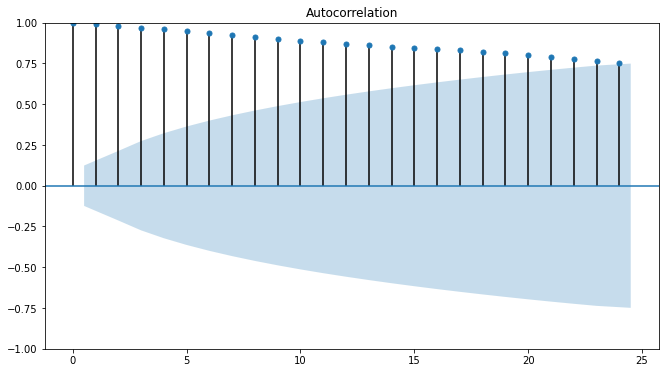

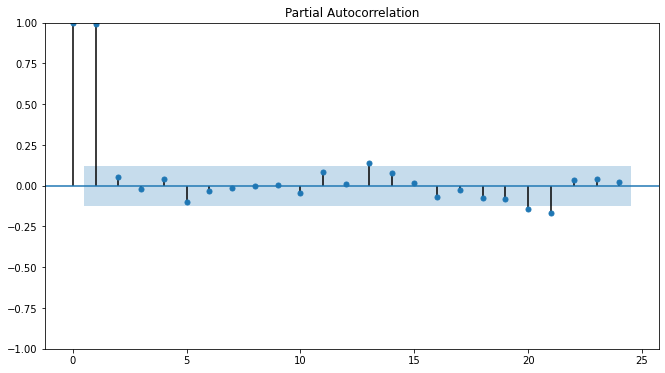

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show

d 차 차분을 구해 보고 이때 시계열이 안정된 상태인지 확인해 보아야 함 

Resuls of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


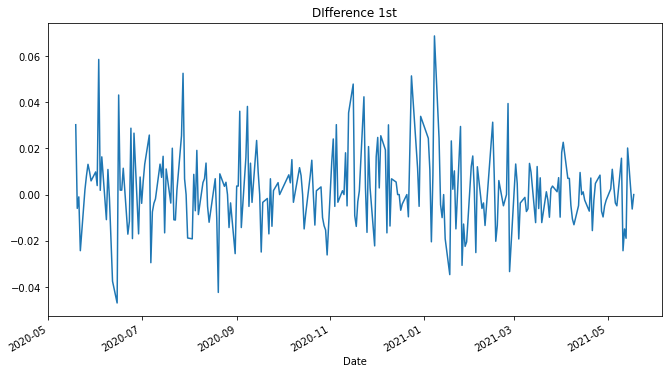

In [ ]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='DIfference 1st')

augmented_dickey_fuller_test(diff_1)

Resuls of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


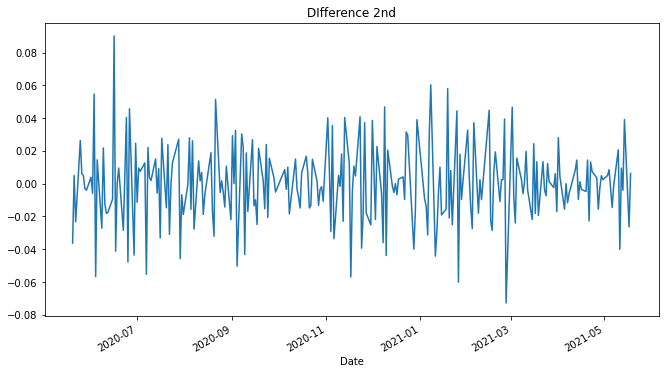

In [ ]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='DIfference 2nd')

augmented_dickey_fuller_test(diff_2)

#### STEP 6 : Arima Model Training 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data,order=(2,0,1))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Mon, 14 Feb 2022   AIC                          -1156.722
Time:                        07:07:06   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

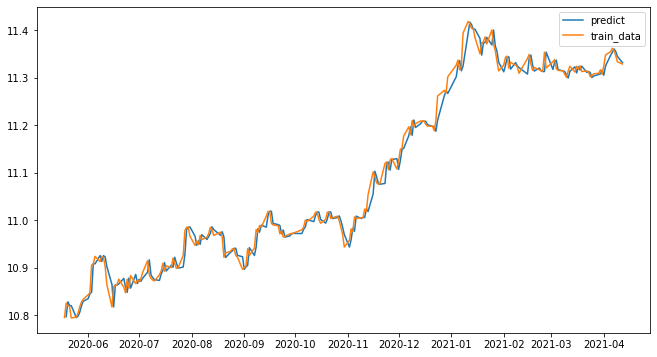

In [ ]:

fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m,label='predict')
plt.plot(train_data,label='train_data')
plt.legend()

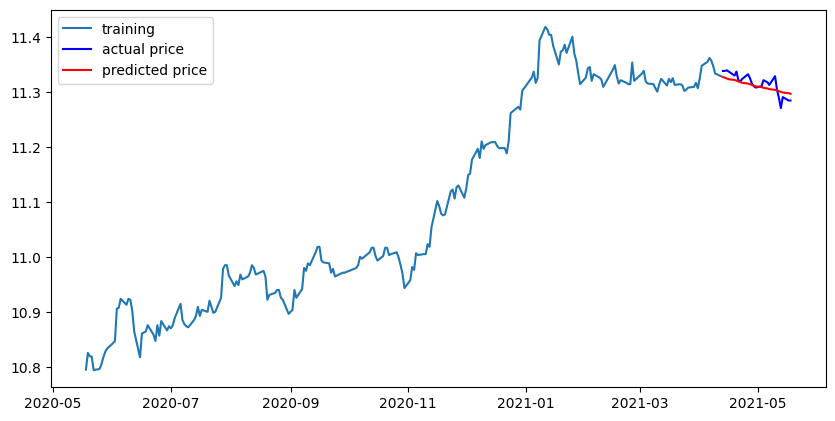

In [ ]:
model = ARIMA(train_data,order=(2,0,1))
fitted_m = model.fit()
fc = fitted_m.forecast(len(test_data),alpha=0.005)
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)


plt.figure(figsize=(10,5),dpi=100)
plt.plot(train_data,label='training')
plt.plot(test_data,c='b',label='actual price')
plt.plot(fc_series,c='r', label = 'predicted price')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE :',mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE :',mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(fc)))
print('RMSE :',rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE : {:.2f}%'.format(mape*100))

MSE : 1048973.6014241837
MAE : 843.7579531511437
RMSE : 1024.194122920154
MAPE : 1.03%


#### STEP 7 : Predicting Other Stocks



---

- Apple Inc.

Date
2021-02-16    133.190002
2021-02-17    130.839996
2021-02-18    129.710007
2021-02-19    129.869995
2021-02-22    126.000000
Name: Close, dtype: float64

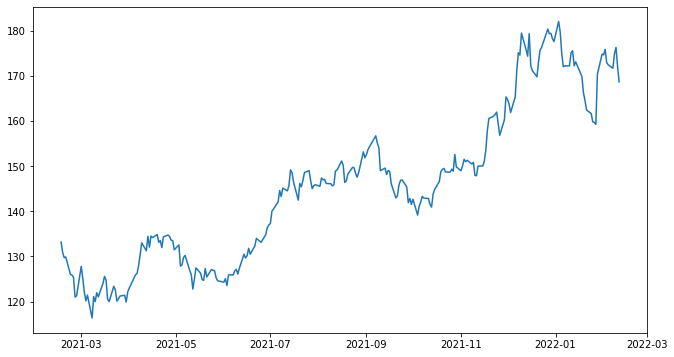

In [ ]:
dataset_filepath = '/content/drive/MyDrive/data/stock_prediction/AAPL.csv'
df = pd.read_csv(dataset_filepath,index_col='Date',parse_dates=True)
ts = df['Close']


plt.plot(ts)
ts.head()

In [ ]:
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [ ]:
# transfer to log
ts_log= np.log(ts)

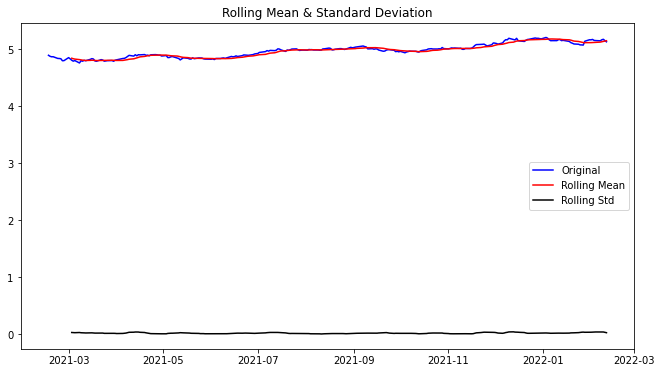

Resuls of Dickey-Fuller Test:
Test Statistic                  -0.749423
p-value                          0.833529
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


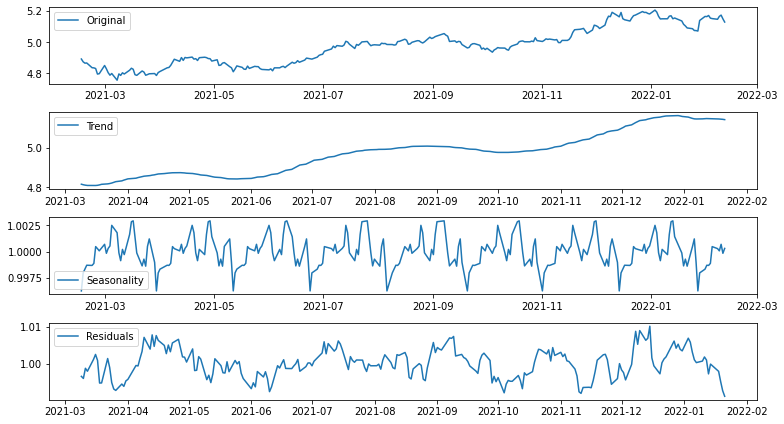

In [ ]:
plot_rolling_statistics(ts_log,window=12)

augmented_dickey_fuller_test(ts_log)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model='multiplicative',period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams['figure.figsize'] = (11,6)
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Resuls of Dickey-Fuller Test:
Test Statistic                  -4.853624
p-value                          0.000043
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


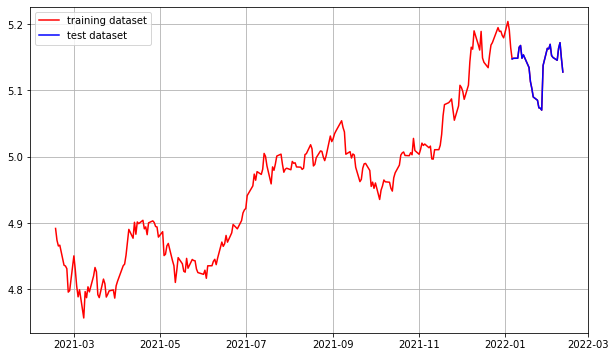

In [ ]:
train_data,test_data = ts_log[:int(len(ts_log)*0.9)],ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log,c='r',label='training dataset')
plt.plot(test_data,c='b',label='test dataset')
plt.legend()

<function matplotlib.pyplot.show>

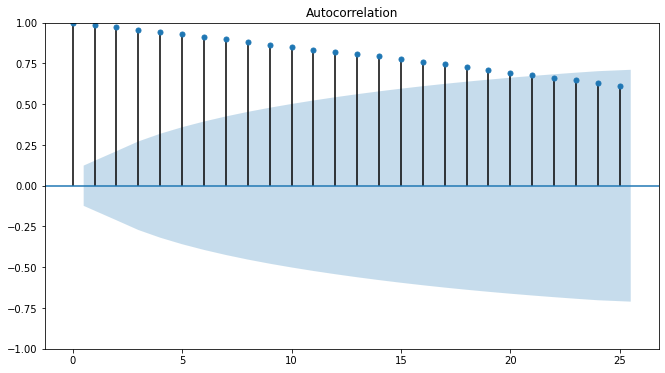

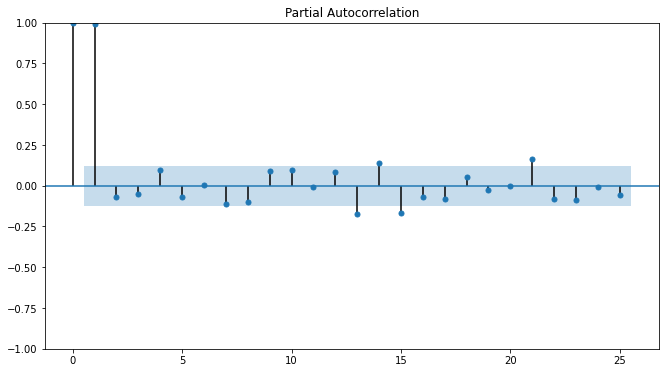

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show

Resuls of Dickey-Fuller Test:
Test Statistic                -1.598219e+01
p-value                        6.815993e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


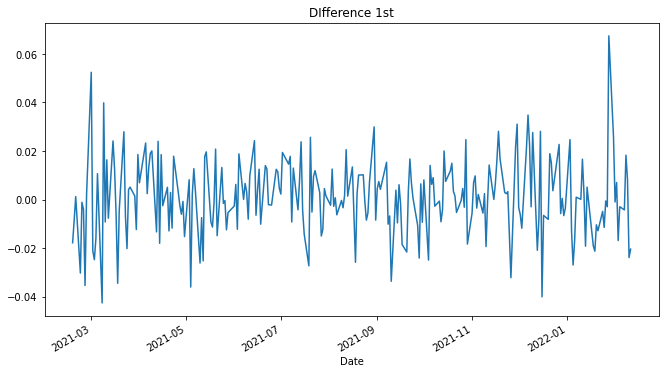

In [ ]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='DIfference 1st')

augmented_dickey_fuller_test(diff_1)

Resuls of Dickey-Fuller Test:
Test Statistic                -7.568474e+00
p-value                        2.883269e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


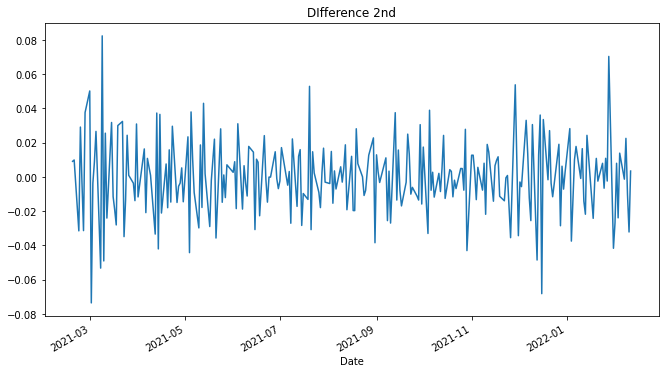

In [ ]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='DIfference 2nd')

augmented_dickey_fuller_test(diff_2)

In [ ]:

model = ARIMA(train_data,order=(2,1,0))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 621.974
Date:                Mon, 14 Feb 2022   AIC                          -1237.947
Time:                        07:11:11   BIC                          -1227.699
Sample:                             0   HQIC                         -1233.811
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0765      0.066     -1.153      0.249      -0.206       0.054
ar.L2         -0.0391      0.061     -0.646      0.518      -0.158       0.080
sigma2         0.0002   2.06e-05     11.285      0.0

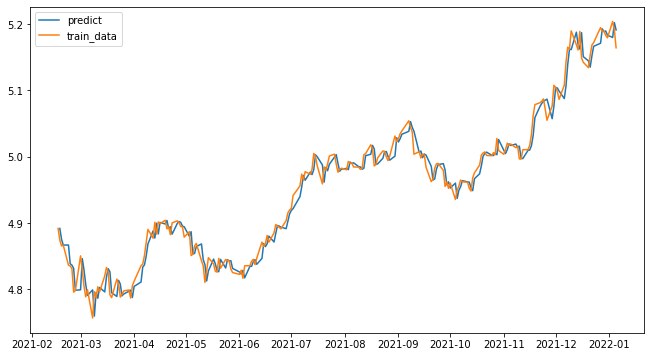

In [ ]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m,label='predict')
plt.plot(train_data,label='train_data')
plt.legend()

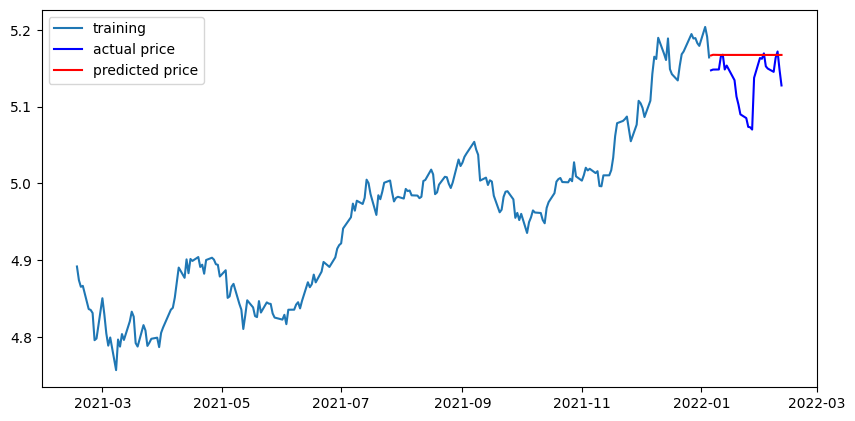

In [ ]:
model = ARIMA(train_data,order=(2,1,0))
fitted_m = model.fit()
fc = fitted_m.forecast(len(test_data),alpha=0.005)
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)


plt.figure(figsize=(10,5),dpi=100)
plt.plot(train_data,label='training')
plt.plot(test_data,c='b',label='actual price')
plt.plot(fc_series,c='r', label = 'predicted price')

plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE :',mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE :',mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(fc)))
print('RMSE :',rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE : {:.2f}%'.format(mape*100))

MSE : 58.90434063621574
MAE : 5.580917315346929
RMSE : 7.674916327636136
MAPE : 3.39%




---
- Amazon.com Inc.


Date
2021-02-16    3268.949951
2021-02-17    3308.639893
2021-02-18    3328.229980
2021-02-19    3249.899902
2021-02-22    3180.739990
Name: Close, dtype: float64

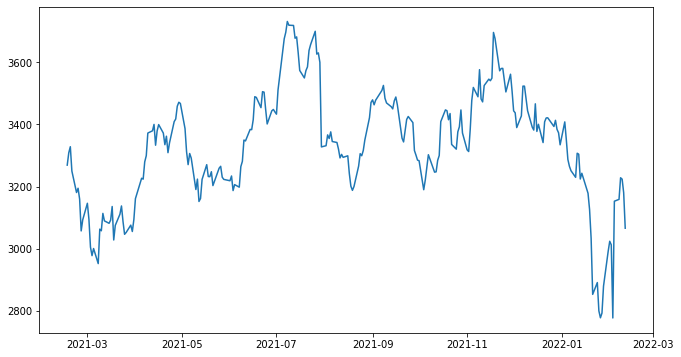

In [ ]:
dataset_filepath = '/content/drive/MyDrive/data/stock_prediction/AMZN.csv'
df = pd.read_csv(dataset_filepath,index_col='Date',parse_dates=True)
ts = df['Close']


plt.plot(ts)
ts.head()

In [ ]:
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [ ]:
# transfer to log
ts_log= np.log(ts)

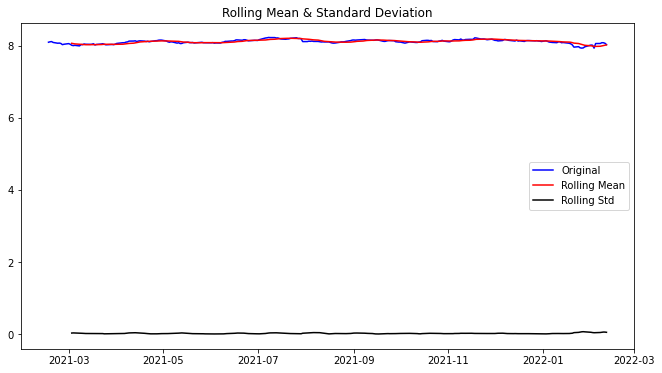

Resuls of Dickey-Fuller Test:
Test Statistic                  -2.453086
p-value                          0.127310
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


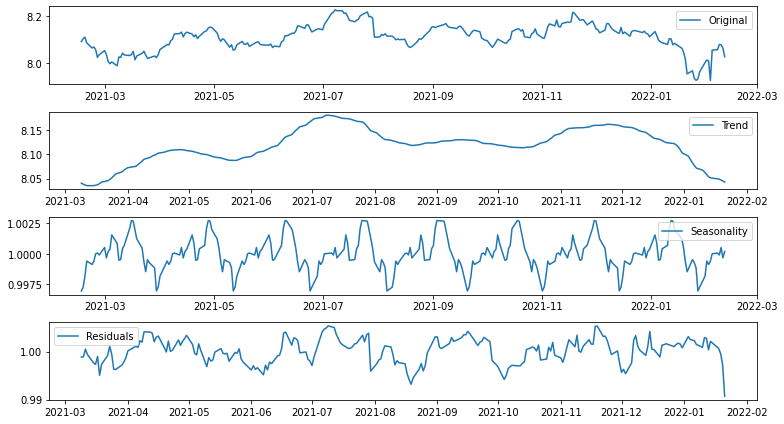

In [ ]:
plot_rolling_statistics(ts_log,window=12)

augmented_dickey_fuller_test(ts_log)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model='multiplicative',period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams['figure.figsize'] = (11,6)
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Resuls of Dickey-Fuller Test:
Test Statistic                  -4.379738
p-value                          0.000322
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


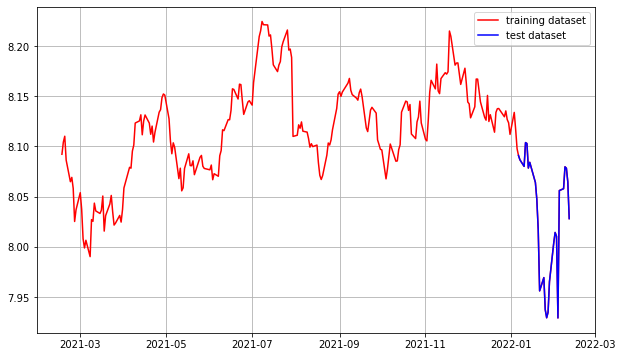

In [ ]:
train_data,test_data = ts_log[:int(len(ts_log)*0.9)],ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log,c='r',label='training dataset')
plt.plot(test_data,c='b',label='test dataset')
plt.legend()

<function matplotlib.pyplot.show>

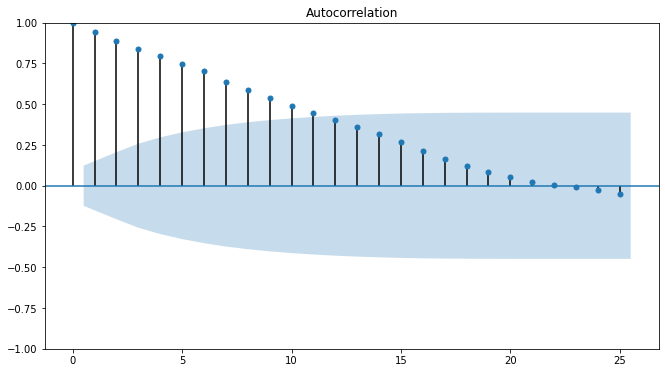

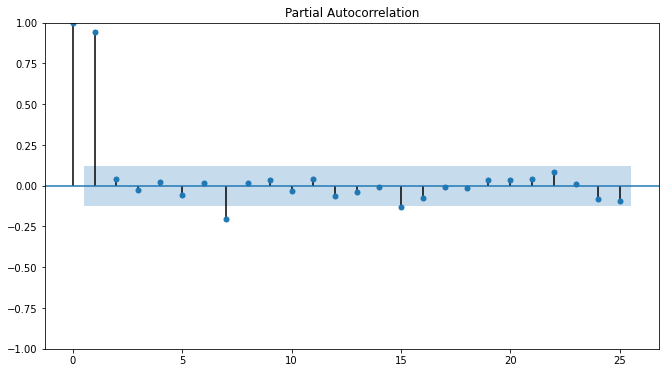

In [ ]:
plot_acf(ts_log)
plot_pacf(ts_log)
plt.show

Resuls of Dickey-Fuller Test:
Test Statistic                -1.620587e+01
p-value                        4.032893e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


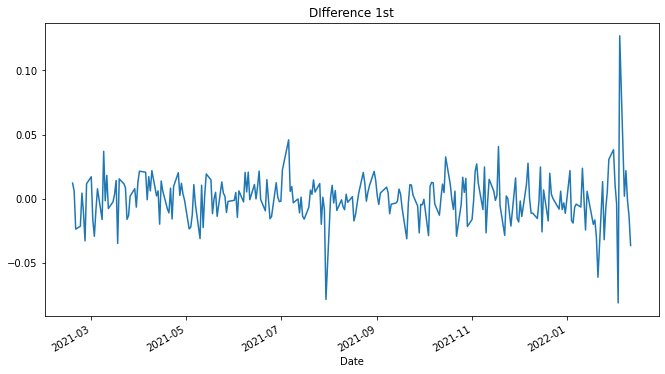

In [ ]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='DIfference 1st')

augmented_dickey_fuller_test(diff_1)

Resuls of Dickey-Fuller Test:
Test Statistic                -8.067148e+00
p-value                        1.585041e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


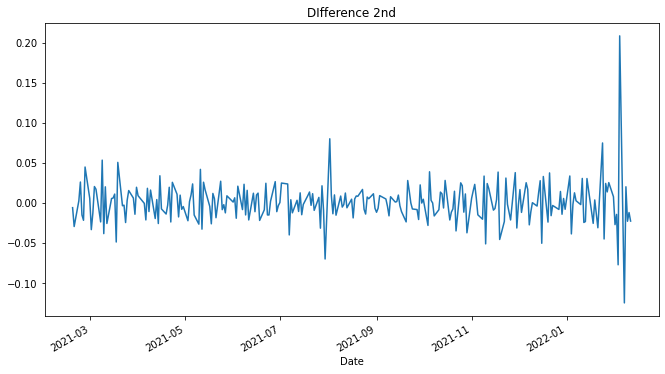

In [ ]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='DIfference 2nd')

augmented_dickey_fuller_test(diff_2)

In [ ]:
model = ARIMA(train_data,order=(3,0,1))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 629.949
Date:                Mon, 14 Feb 2022   AIC                          -1247.897
Time:                        07:13:57   BIC                          -1227.374
Sample:                             0   HQIC                         -1239.615
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1148      0.018    445.647      0.000       8.079       8.151
ar.L1          0.6840      3.139      0.218      0.828      -5.468       6.836
ar.L2          0.2502      3.254      0.077      0.9

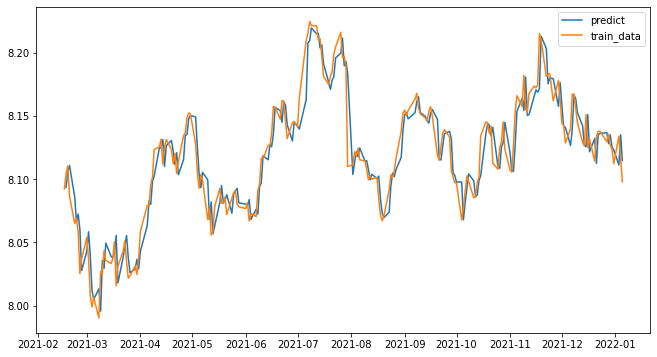

In [ ]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m,label='predict')
plt.plot(train_data,label='train_data')
plt.legend()

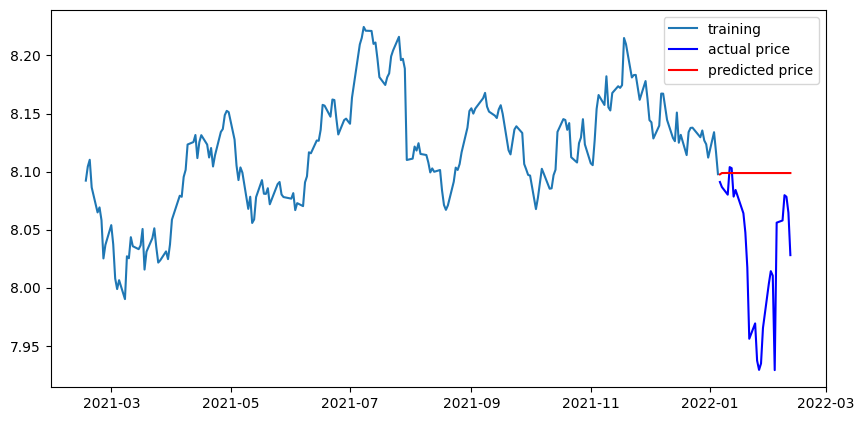

In [ ]:
model = ARIMA(train_data,order=(2,1,0))
fitted_m = model.fit()
fc = fitted_m.forecast(len(test_data),alpha=0.005)
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)


plt.figure(figsize=(10,5),dpi=100)
plt.plot(train_data,label='training')
plt.plot(test_data,c='b',label='actual price')
plt.plot(fc_series,c='r', label = 'predicted price')

plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE :',mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE :',mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(fc)))
print('RMSE :',rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE : {:.2f}%'.format(mape*100))

MSE : 76859.777461915
MAE : 216.86497642285153
RMSE : 277.2359599004339
MAPE : 7.41%
